In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [73]:
batch_size = 100
mnist_train = dset.MNIST('../data', train=True, download=False, transform=T.ToTensor())
loader_train = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
mnist_test = dset.MNIST('../data', train=False, download=False, transform=T.ToTensor())
loader_test = DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

In [85]:
class Flatten(nn.Module):
    def forword(self, x):
        N, C, H, W = x.size()
        return x.view(N, -1)

In [90]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = Flatten()
        self.inputLayer = torch.nn.Linear(784, 256)
#         self.layer1 = torch.nn.Linear(256, 256)
        self.outputLayer = torch.nn.Linear(256, 10)

    def forward(self, x):
        N, C, H, W = x.size()
        s = F.relu(self.inputLayer(x.view(N, -1)))
#         s = F.relu(self.layer1(s))
        y_hat = F.softmax(self.outputLayer(s), 1)
        return y_hat

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch = 5, loss = 1.4722
Epoch = 10, loss = 1.5163
Epoch = 15, loss = 1.4779
Epoch = 20, loss = 1.4932
Epoch = 25, loss = 1.4760
Epoch = 30, loss = 1.4612
Epoch = 35, loss = 1.4912
Epoch = 40, loss = 1.4612
Epoch = 45, loss = 1.4614
Epoch = 50, loss = 1.4612
Got 9790 / 10000 correct (97.90)


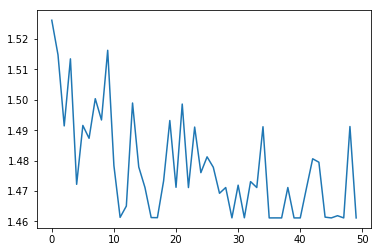

In [81]:
learning_rate = 0.001

model = Model()
lossfn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            
cost = []
def train(model, loss_fn, optimizer, num_epochs=1):
    for epoch in range(num_epochs):
        loss = None
        for t, (x, y) in enumerate(loader_train):
            x_var = x.float()
            y_var = y.long()
            y_hat = model(x_var)
            loss = lossfn(y_hat, y_var)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        cost.append(loss.data[0])
        if (epoch + 1) % (num_epochs / 10) == 0:
            print('Epoch = %d, loss = %.4f' % (epoch + 1, cost[-1]))

def check_accuracy(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval()
    for x, y in loader:
        x_var = x.float()
        scores = model(x_var)
        _, preds = scores.max(1)
        num_correct += (preds == y.long()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

train(model, lossfn, optimizer, num_epochs=50)
check_accuracy(model, loader_test)
plt.plot(cost)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch = 5, loss = 1.4831
Epoch = 10, loss = 1.4947
Epoch = 15, loss = 1.4645
Epoch = 20, loss = 1.4678
Epoch = 25, loss = 1.4648
Epoch = 30, loss = 1.4612
Epoch = 35, loss = 1.4712
Epoch = 40, loss = 1.4612
Epoch = 45, loss = 1.4712
Epoch = 50, loss = 1.4712
Got 9808 / 10000 correct (98.08)


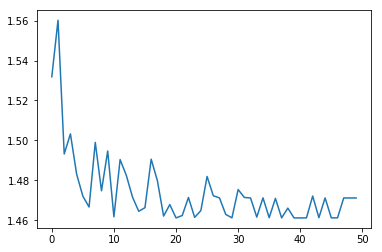

In [91]:
learning_rate = 0.001

model = Model()
lossfn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            
cost = []
def train(model, loss_fn, optimizer, num_epochs=1):
    loss = None
    for epoch in range(num_epochs):
        for t, (x, y) in enumerate(loader_train):
            x_var = x.float()
            y_var = y.long()
            y_hat = model(x_var)
            loss = lossfn(y_hat, y_var)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        cost.append(loss.data[0])
        if (epoch + 1) % (num_epochs / 10) == 0:
            print('Epoch = %d, loss = %.4f' % (epoch + 1, cost[-1]))

def check_accuracy(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval()
    for x, y in loader:
        x_var = x.float()
        scores = model(x_var)
        _, preds = scores.max(1)
        num_correct += (preds == y.long()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))

train(model, lossfn, optimizer, num_epochs=50)
check_accuracy(model, loader_test)
plt.plot(cost)
plt.show()